**Instructions**

1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.
3. What should we do with the `customer_id` column?
4. Load the continuous and discrete variables into `numerical_df` and `categorical_df` variables, for eg.: 
    ```py
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
    ```
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. This time for each categorical variable you will have each unique category in the column on the x-axis and the target(which is numerical) on the y-axis.
6. For the categorical data, check if there is any data cleaning that needs to be performed. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Load the csv.

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


I customise the column names.

In [4]:
customer_df.columns = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]

In [5]:
customer_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

And I again change the column 'effective_to_date' to datetime since it contains only dates and isn't exactly providing categorical values.

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
print(customer_df['effective_to_date'].dtype)

datetime64[ns]


### 3. What should we do with the customer_id column?

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

The customer ID can be set as the index since it is a unique identifier of each row. This way it won't be a problem when encoding the categorical columns.

In [8]:
customer_df = customer_df.set_index('customer')

### 4. Load the continuous and discrete variables into numerical_df and categorical_df variables.

In [9]:
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(np.object)

### 5. Plot every categorical variable. What can you see in the plots? 
#### Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. This time for each categorical variable you will have the unique categories in the column on the x-axis and the target(which is numerical) on the y-axis.

In [10]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

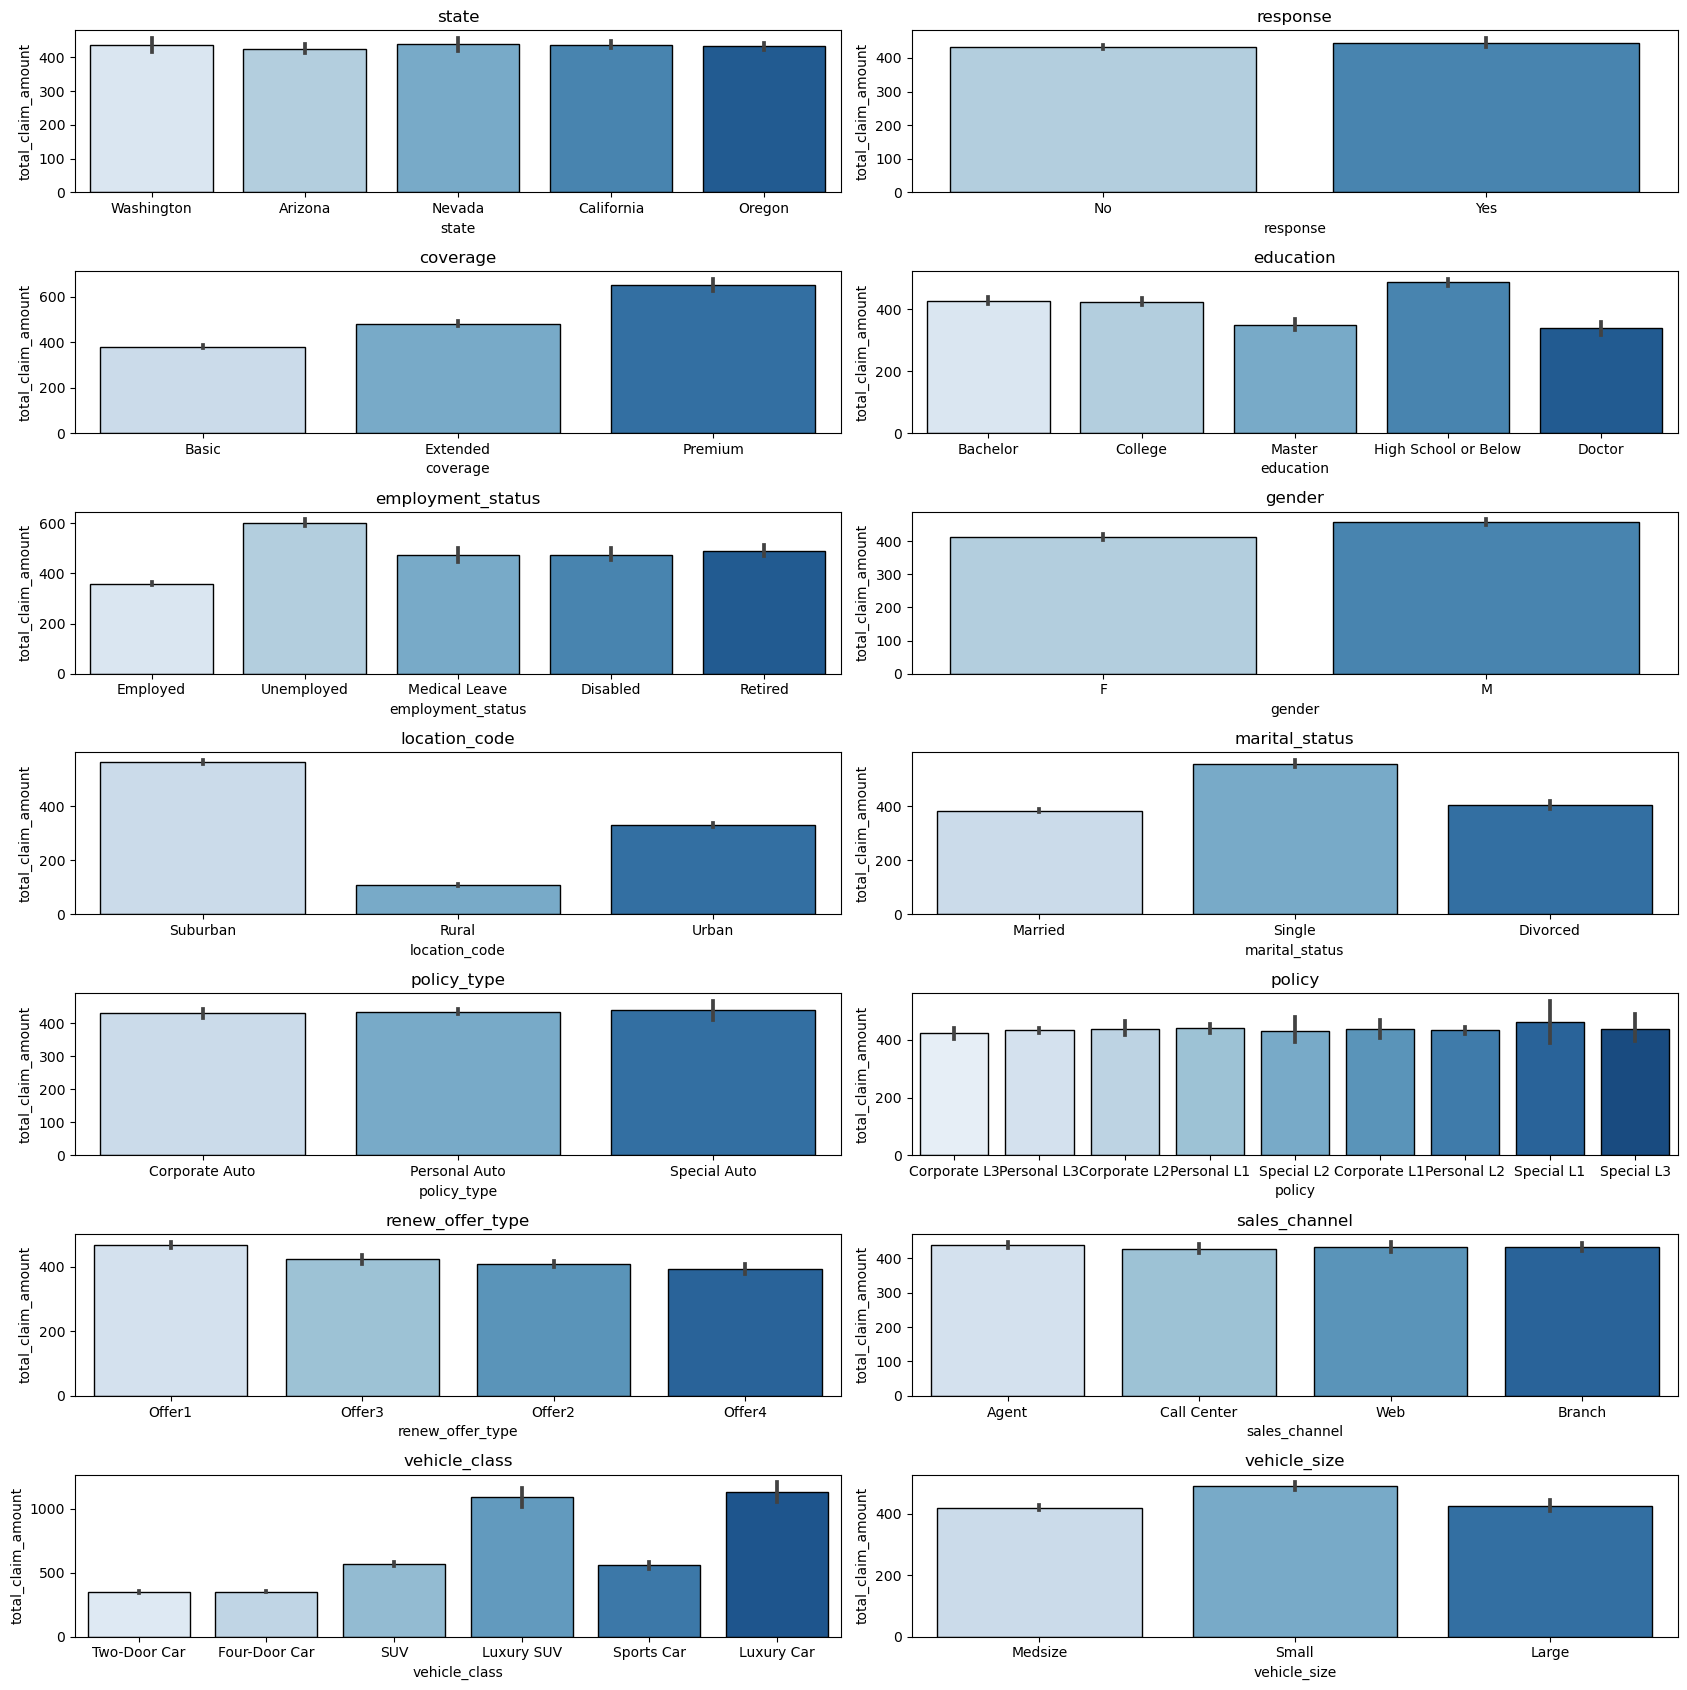

In [11]:
# I create a matrix of the required size.
fig, axs = plt.subplots(7, 2, figsize=(17, 17)) 
axs = axs.flatten()

# I iterate through the different categorical columns, add a color scheme and set a title for each histogram.
for i, column in enumerate(categorical_df.columns):
    sns.barplot(x=column, y='total_claim_amount', data=customer_df, palette='Blues', edgecolor='black', ax=axs[i])
    axs[i].set_title(column)

# I improve the layout, because the plots were displayed too close to each other.
plt.tight_layout()
plt.show()

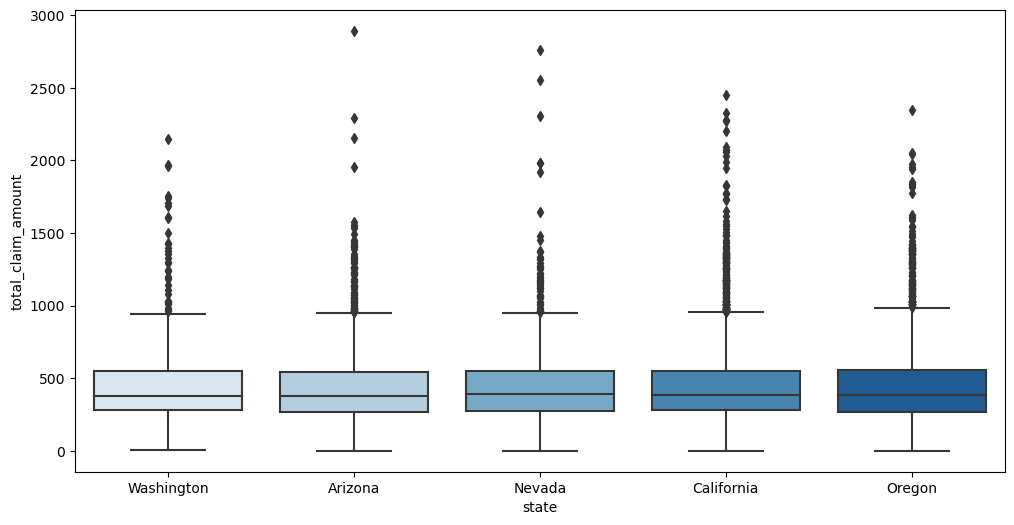

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='total_claim_amount', data=customer_df, palette='Blues')
plt.show()

The barplot shows the mean or median of the total claim amount for each category. The boxplot shows me also the outliers for each unique category. Neither one are useful to display the distribution of the target, which is a continous variable. By using histograms to compare the total_claim_amount across different categories, I can see the shape of the distribution, as well as any differences in the mean, median, or spread of the data among categories. See below where I create overlaying histograms for the categoricals variables with only two or three unique categories.

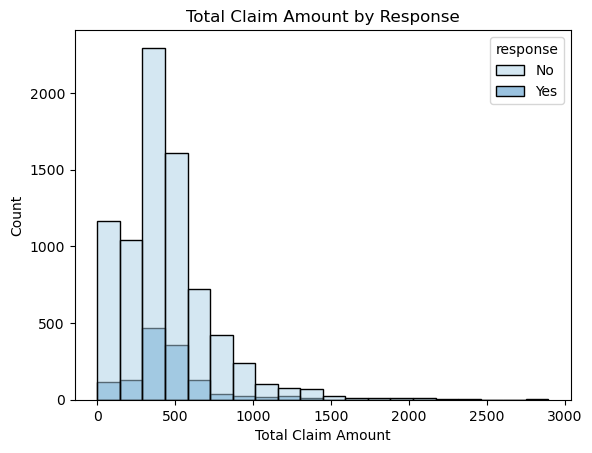

In [13]:
# Here I create overlaid histograms with response on the x-axis and total_claim_amount on the y-axis.
sns.histplot(data=customer_df, x='total_claim_amount', hue='response', alpha=0.5, palette='Blues', edgecolor='black', bins=20)

# I can also use multiple='stack' instead of a transparency factor alpha to stack the different categories on top of each other.

# I set the labels.
plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Response')

plt.show()

In [14]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [15]:
7826/1308

5.983180428134556

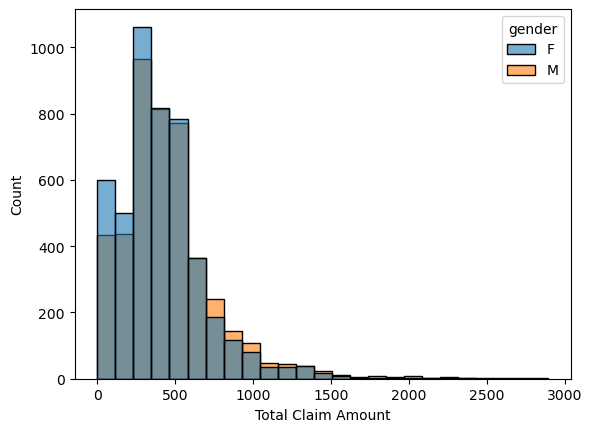

In [16]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='gender', alpha=0.6, edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')

plt.show()

In [17]:
categorical_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

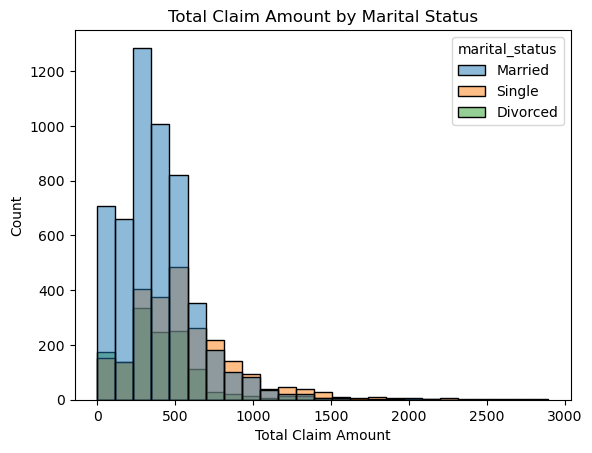

In [18]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='marital_status', alpha=0.5, edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Marital Status')

plt.show()

In [19]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

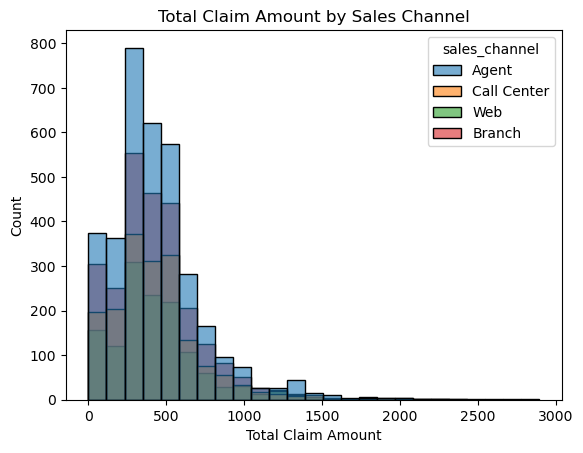

In [20]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='sales_channel', alpha=0.6, edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Sales Channel')

plt.show()

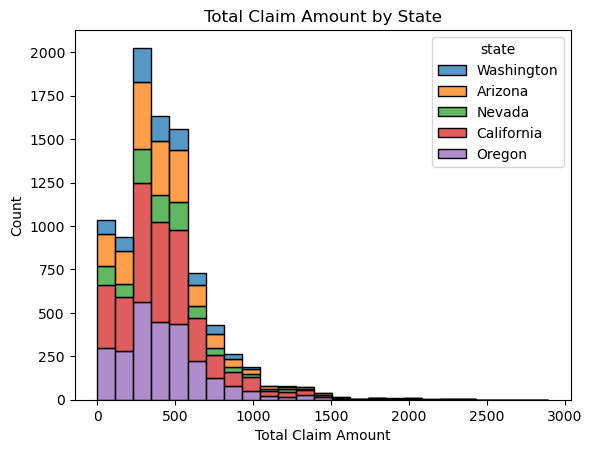

In [21]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='state', multiple='stack', edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by State')

plt.show()

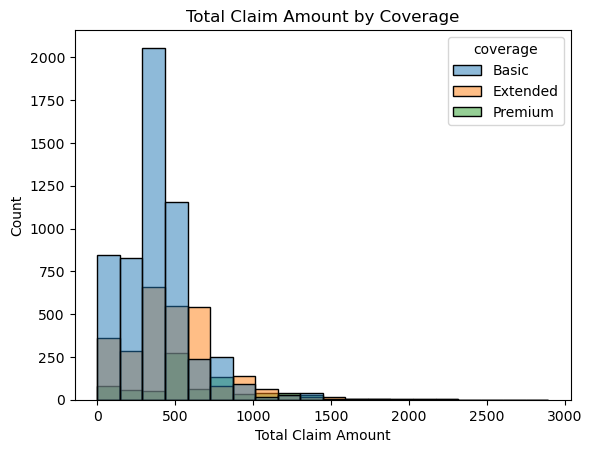

In [22]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='coverage', alpha=0.5, edgecolor='black', bins=20)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Coverage')

plt.show()

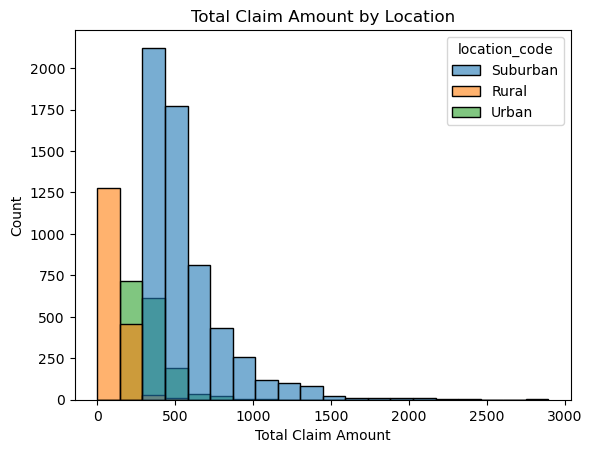

In [23]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='location_code', alpha=0.6, edgecolor='black', bins=20)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Location')

plt.show()

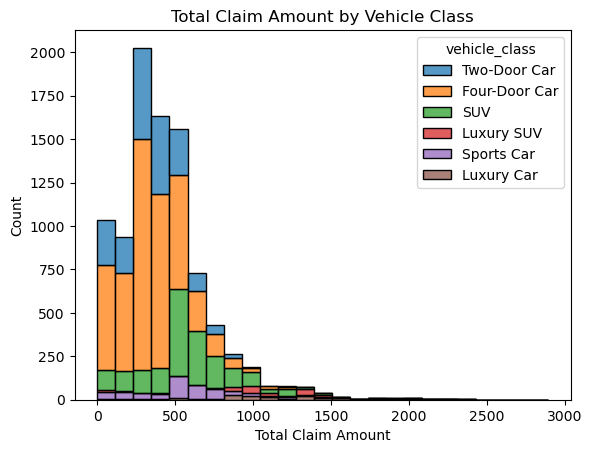

In [24]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='vehicle_class', multiple='stack', edgecolor='black', bins=25)
#plt.yscale('power', power=2)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Vehicle Class')

plt.show()

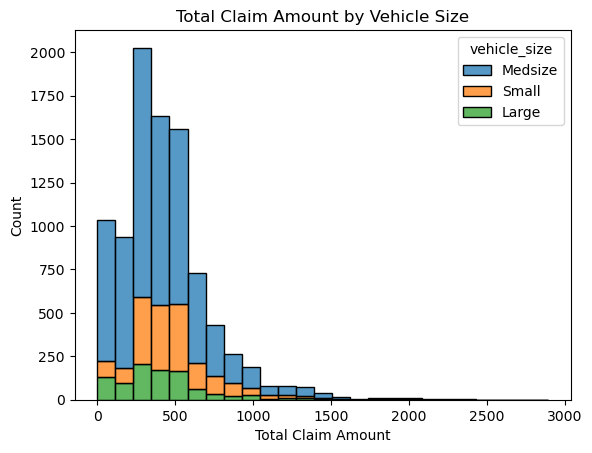

In [25]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='vehicle_size', multiple='stack', edgecolor='black', bins=25)
#plt.yscale('power', power=2)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Vehicle Size')

plt.show()

In [26]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

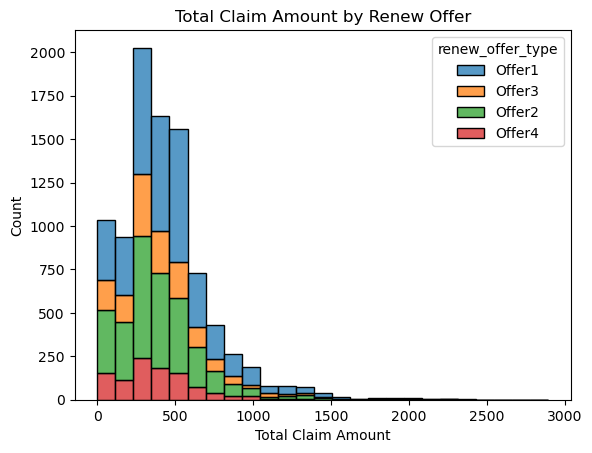

In [27]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='renew_offer_type', multiple='stack', edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Renew Offer')

plt.show()

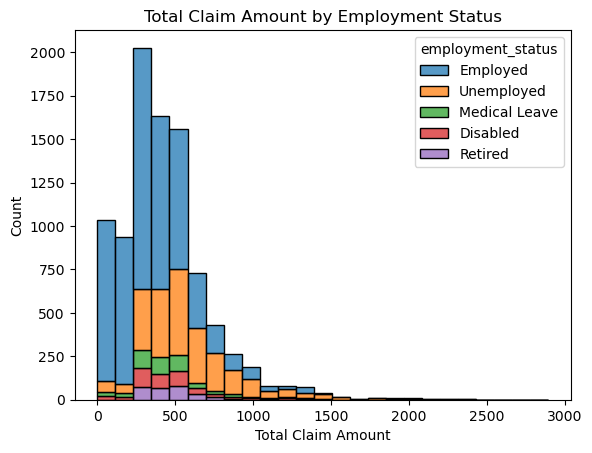

In [28]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='employment_status', multiple='stack', edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Employment Status')

plt.show()

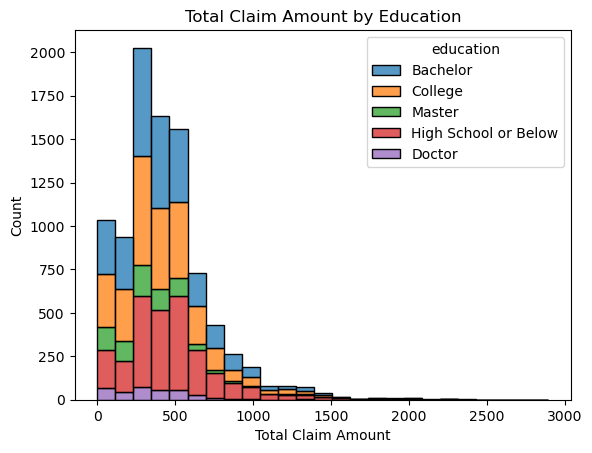

In [29]:
sns.histplot(data=customer_df, x='total_claim_amount', hue='education', multiple='stack', edgecolor='black', bins=25)

plt.xlabel('Total Claim Amount')
plt.ylabel('Count')
plt.title('Total Claim Amount by Education')

plt.show()

To summarize a few key findings:

- The highest number of claims are by customers from Oregon and California.
- Customers of both genders claim with the same frequency and the same total amount according to their appear
- Customers claim the same amount independent of their marital status since the proportion of claims is exactly the same as the proportion of marital status in the dataset.
- Customers with no response claim by far more than with a response. The proportion of customers that did not responded to those that did respond in the dataset is 6:1.
- The more basic the coverage package the more claims. Customers with the premium coverage package are claiming higher amounts but with much less frequency.
- Customers with a lower education level claim more often.
- Employed customers make up the highest number of claimants, unemployed the second highest and the rest behaves very similar to each other. This is porportional to the number of customers with each status in the dataset.
- The total amount claimed in suburban areas is much higher than in rural areas. The maximum claim amount in rural areas per customer is 500.
- Renew offer 1 and 2 result in a higher number of claims across all amounts than offers 3-4.
- Customers with a luxurious car claim higher amounts.
- In person sales via agent or branch equal a higher number of claims than via web or call center, which is correspondent to the number of customers that bought offline in comparison to online.

### 6. For the categorical data, check if there is any data cleaning that needs to be performed. 
#### **Hint**: You can use the function 'value_counts()' on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

There are also no NaNs or null values (something I had already checked for in the last lab).

In [30]:
# I apply value_counts to each categorical variable.
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Using 'value_counts', I can observe possible high cardinality. For the variables in the categorical_df there isn't any. If the counts are also representative of the actual customer data, then there is no data cleaning required.

But in the column 'policy' the categories could be bucketed into ['Personal', 'Corporate' and 'Special'] since there isn't much difference between the three of each and in the relation of all of the 9 categories with the target. Something I can also observe from the above plots. 

In [31]:
def reduced_policy(x):
    if x in ['Personal L3', 'Personal L2', 'Personal L1']:
        return 'Personal'
    elif x in ['Corporate L3', 'Corporate L2', 'Corporate L1']:
        return 'Corporate'
    else:
        return 'Special'
    
categorical_df['policy'] = categorical_df['policy'].apply(reduced_policy)

Since 'policy' and 'policy_type' have essentially the same information, as I explained earlier, I drop 'policy_type'.

In [32]:
categorical_df = categorical_df.drop('policy_type', axis=1)

The gender does not have an impact on the total claim amount since customers of both genders claim the same amount, hence I drop the column.

In [33]:
categorical_df = categorical_df.drop('gender', axis=1)

The marital_status does not have an impact on the total claim amount since customers of all status claim, hence I drop the column.

In [34]:
categorical_df = categorical_df.drop('marital_status', axis=1)

Also the categories in the column 'vehicle_class' can be merged since there is no essential difference in the behaviour of customers with normal, inter-mediate and luxurious cars respectively.

In [35]:
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [36]:
def reduced_vehicle_class(x):
    if x in ['Four-Door Car', 'Two-Door Car']:
        return 'Normal Car'
    elif x in ['Luxury SUV', 'Luxury Car']:
        return 'Luxury Car'
    else:
        return 'Medium-Class Car'
    
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(reduced_vehicle_class)

The same applies for different education levels. Here I can bucket the existing 6 categories into 3.

In [37]:
def reduced_education(x):
    if x in ['Bachelor', 'College']:
        return 'Bachelor or College'
    elif x in ['Master', 'Doctor']:
        return 'Doctor or Master'
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(reduced_education)

Employed customers make up the highest number of claimants, unemployed the second highest and the rest behaves very similar to each other. Hence I can merge those into one category.

In [38]:
categorical_df['employment_status'] = categorical_df['employment_status'].apply(lambda x: x if x.endswith('ployed') else 'Other status')

Since customers with renew offer 1 and 2 behave similar and those with renew offer 3 and 4, I merge each pair into one.

In [39]:
def reduced_renew_offer(x):
    if x in ['Offer 1', 'Offer 2']:
        return 'Offer 1-2'
    else:
        return 'Offer 3-4'

categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(reduced_renew_offer)              

In [40]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'location_code', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [41]:
categorical_df.to_csv('categoricals.csv')